X.shape: (26, 2)


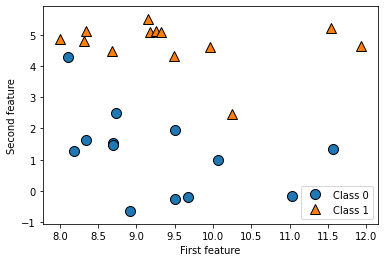

In [1]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

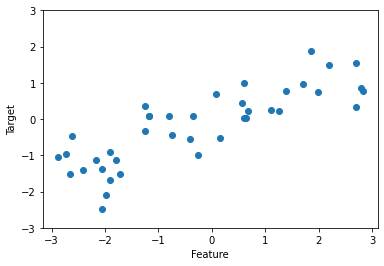

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer.keys(): \n{cancer.keys()}')

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(f'Shape od cancer data: {cancer.data.shape}')

Shape od cancer data: (569, 30)


In [6]:
import numpy as np
print('Sample counts per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print(f'Feature names: \n{cancer.feature_names}')

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f'Data shape: {boston.data.shape}')

Data shape: (506, 13)


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [9]:
X, y  = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

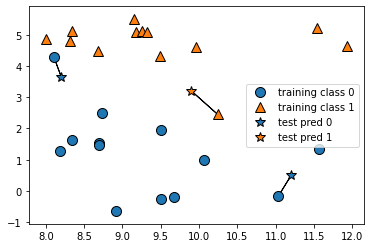

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

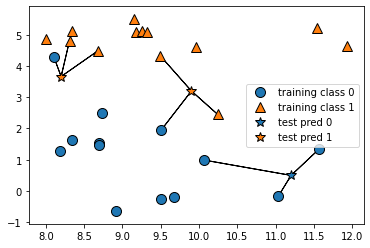

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y =mglearn.datasets.make_forge()

X_train ,X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print(f'Test set predictions: {clf.predict(X_test)}')

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print(f'Test set accuracy: {clf.score(X_test, y_test): .2f}')

Test set accuracy:  0.86


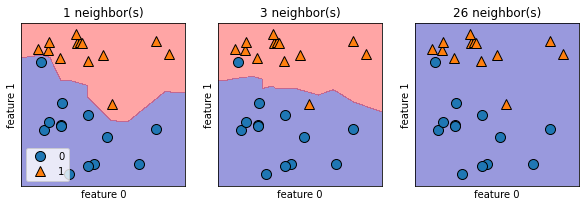

In [18]:
fig ,axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,26], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

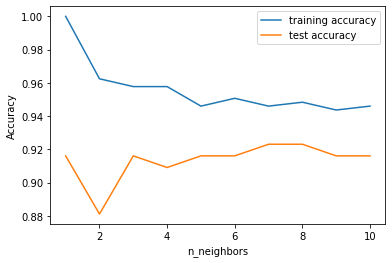

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train ,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

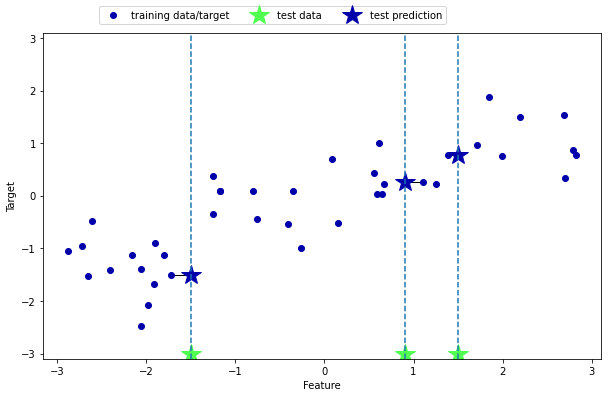

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

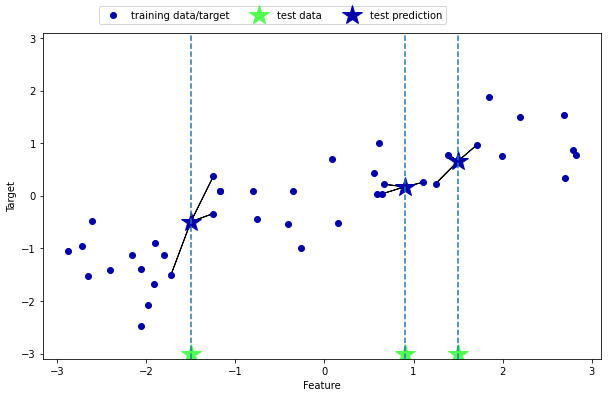

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
print(f'Test set predictions: \n{reg.predict(X_test)}')

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
print(f'Test set R^2: {reg.score(X_test, y_test):.2f}')

Test set R^2: 0.83


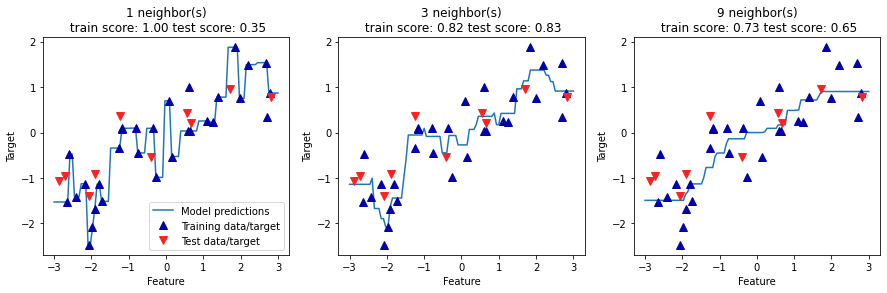

In [29]:
fig , axes= plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3, 3, 100).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,  y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,  y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)) 
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


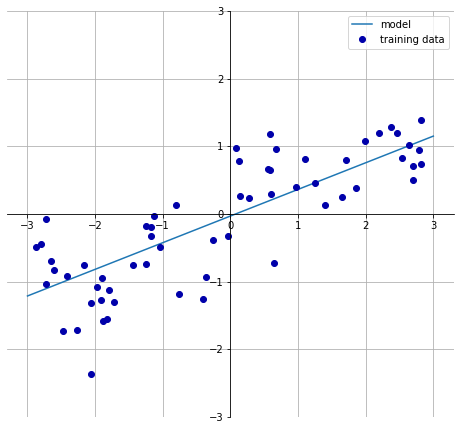

In [30]:
 mglearn.plots.plot_linear_regression_wave()

In [35]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print(f'lr.coef_:{lr.coef_}')

lr.coef_:[0.39390555]


In [38]:
print(f'lr.intercept_: {lr.intercept_}')

lr.intercept_: -0.031804343026759746


In [39]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')

Training set score: 0.67


In [40]:
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Test set score: 0.66


In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_train , X_test, y_train, y_test = train_test_split(X,y , random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [42]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')

Training set score: 0.95


In [43]:
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Test set score: 0.61


In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train)}')
print(f'Test set score: {ridge.score(X_test, y_test)}')

Training set score: 0.8857966585170941
Test set score: 0.7527683481744752


In [45]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'Training set score: {ridge10.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge10.score(X_test, y_test):.2f}')

Training set score: 0.79
Test set score: 0.64


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'Training set score: {ridge01.score(X_train, y_train)}')
print(f'Test set score: {ridge01.score(X_test, y_test)}')

Training set score: 0.928227368500199
Test set score: 0.7722067936479817


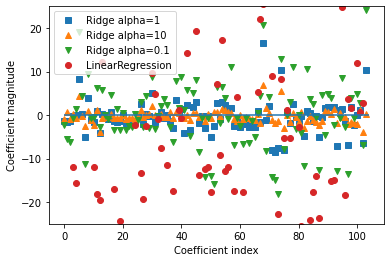

In [47]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

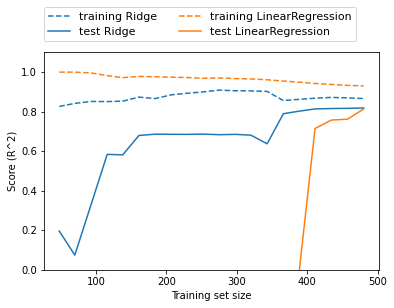

In [48]:
mglearn.plots.plot_ridge_n_samples()

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'Training set score: {lasso.score(X_train, y_train)}')
print(f'Test set score: {lasso.score(X_test, y_test)}')
print(f'Number of  features used: {np.sum(lasso.coef_ != 0)}')

Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of  features used: 4


In [50]:
lasso001 = Lasso(alpha=0.01, max_iter =100000).fit(X_train, y_train)
print(f'Training set score: {lasso001.score(X_train, y_train)}')
print(f'Test set score: {lasso001.score(X_test, y_test)}')
print(f'Number of features used: {np.sum(lasso001.coef_ != 0)}')

Training set score: 0.8962226511086497
Test set score: 0.7656571174549982
Number of features used: 33
